In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This post is going to introduce logistic regression with an emphasis on explaining the coefficients in the output of Python's statsmodels.

### 1. Background

Logistic regression is used to solve the classification problem. Classification problem means the dependent variable is categorical. For example, we can build a machine learning model to predict whether a student will be admitted to college based on metrics like his or her GPA, standardized test scores. If we formulate a classification problem in mathematical form, we have:

\begin{equation}
y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2},
\end{equation}
where y is a categorical variable, like whether you are admited or not.

One way to approach this problem is by using linear regression. However, we would like our algorithm will output a number between 0 and 1, which can indicate the probability of an observation belonging to a certain category. Linear regression does not satisfy this requirement as it might output values smaller than 0 or larger than 1.

One solution is to solve this problem is to transform the value of $\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}$ to the range of [0,1]. We can do this with the logistic function:
$$f(x)=\frac{e^{x}}{1+e^{x}}$$.

To show that logistic regression will make a number between 0 and 1. Let's make a plot of it.

In [2]:
def logit(x):
    return np.exp(x)/(1+np.exp(x))

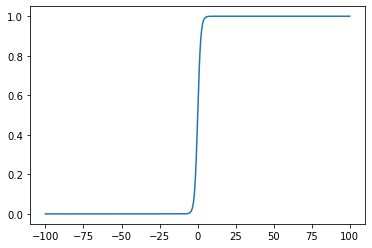

In [3]:
x = np.arange(-100, 100, 0.1)
y = logit(x)
plt.plot(x,y);

As we can see, the logit function has a S shape and is bounded by 0 and 1. When x is approaching positive infinity, the logit of x approaches 1. When x is approaching negative infinity, the logit of x approaches 0.

Thus, we can transform the value of $\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}$ to:

$$
p(X)=\frac{e^{\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}}}{1+e^{\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}}}
$$

Now the output of our regression will fall between zero and one. Since we the logistic function to achieve this, the regression is called logistic regression. Before jumping into the details of behind it, let's first we how to run it in python.

### 2. Python Implementation of Logistic Regression

For this post, we are going to use a college admission dataset from [UCLA's Institute for Digital Research & Education](https://stats.idre.ucla.edu/). We want to use a student's GRE score, GPA, and rank to predict whether he will be admitted. 

In [4]:
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

In [5]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


We are going to use the statsmodel to run the logistic regression. We choose statsmodel because its interface and summary of the result are more similar to other statistical software, like R and Stata.

In [6]:
import statsmodels.formula.api as smf

In [7]:
mod = smf.ols(formula='admit ~ gre + gpa + rank', data=df).fit()

In [8]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     14.02
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           1.05e-08
Time:                        14:48:20   Log-Likelihood:                -241.53
No. Observations:                 400   AIC:                             491.1
Df Residuals:                     396   BIC:                             507.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1824      0.217     -0.841      0.401      -0.609       0.244
gre            0.0004      0.000      2.106      0.036    2.94e-05       0.001
gpa            0.1510      0.063      2.383      0.018       0.026       0.276
rank          -0.1095      0.024     -4.608      0.000      -0.156      -0.063
==============================================================================
Omnibus:                      190.649   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.425
Skew:                           0.667   Prob(JB):                     6.81e-12
Kurtosis:                       1.858   Cond. No.                     6.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3. Interpretation of the Result

#### 3.1 Prediction

#### 3.2 Probability, odd, log-odd

Let $k = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}$. Then we have: $p(X)=\frac{e^{k}}{1+e^{k}}$.

Then, $p(x) + p(x)e^k = e^k$. Then $p(x) = e^k - p(x)e^k = e^k(1-p(x))$. Thus, $e^{k} = \frac{p(x)}{1-p(x)}$.
The quantity $\frac{p(x)}{1-p(x)}$ is called the *odds*.

Taking log from both side the odds equation, we have $k= log(\frac{p(x)}{1-p(x)})$. This quantity $log(\frac{p(x)}{1-p(x)})$ the *log-odds*.

Bringing back the value of k, we have: $log(\frac{p(x)}{1-p(x)}) =  \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2}$. 

What we are actually evaluating when running the python code in the section is the equation above. Thus, the prediction we made is not the probability, but the log-odds.

To evaluate the probability, we can put the log-odds we predict back to the formula $p(X)=\frac{e^{k}}{1+e^{k}}$, as k is the log-odd we predict.

In code, we have:

In [9]:
def prob_from_log_odd(log_odds):
    prob = np.exp(log_odds)/1+np.exp(log_odds)
    return prob

#### 3.3 Coefficient Explanation

### 4. Estimation Method